In [23]:
import pandas as pd
import sklearn
import seaborn as sns
import numpy
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

# Informações sobre o Dataset:

### Idade: 

Importância: A idade é um fator crucial na previsão de doenças cardiovasculares, como o infarto, pois o risco aumenta com o envelhecimento. Pessoas mais velhas têm uma probabilidade maior de desenvolver problemas cardíacos.
Unidade de medida: Anos.

### Gênero:

Importância: O gênero também é um fator importante, pois existem diferenças biológicas entre homens e mulheres que podem afetar o risco de doenças cardíacas. Normalmente, os homens têm um risco maior.
Unidade de medida: Variável categórica (masculino = 1/feminino = 0).

### Batimentos por Minuto (BPM):

Importância: A frequência cardíaca indica como o coração está funcionando. Taxas elevadas ou baixas de batimentos por minuto podem indicar problemas no sistema cardiovascular.
Unidade de medida: Batimentos por minuto (bpm).

### Pressão Máxima (Sistólica):

Importância: A pressão arterial sistólica é uma medida da pressão nas artérias quando o coração está batendo. Valores elevados podem indicar hipertensão, um fator de risco para doenças cardíacas.
Unidade de medida: Milímetros de mercúrio (mmHg).

### Pressão Mínima (Diastólica):

Importância: A pressão arterial diastólica é a pressão nas artérias quando o coração está relaxado entre batimentos. Valores elevados podem indicar estresse nas artérias.
Unidade de medida: Milímetros de mercúrio (mmHg).

### Glicose:

Importância: Níveis elevados de glicose no sangue podem indicar resistência à insulina ou diabetes, fatores que aumentam o risco de doenças cardíacas.
Unidade de medida: Miligramas por decilitro (mg/dL).

### Ck-Mb:

Importância: A enzima CK-Mb é liberada quando há dano nas células musculares, incluindo as do coração. Níveis elevados podem indicar um possível ataque cardíaco.
Unidade de medida: Unidades por litro (ng/mL).

### Troponina:

Importância: A troponina é outra proteína liberada quando ocorre dano ao músculo cardíaco. Seus níveis elevados também podem indicar problemas cardíacos.
Unidade de medida: Nanogramas por mililitro (ng/mL).

## Leitura do Conjunto de Dados de Ataque Cardíaco

Nesta parte do código, estamos utilizando a biblioteca pandas para ler um conjunto de dados chamado "Heart Attack.csv". O conjunto de dados é carregado na variável 'Data'.


In [2]:
Data = pd.read_csv("Heart Attack.csv")
print(Data)

      age  gender  impluse  pressurehight  pressurelow  glucose    kcm  \
0      64       1       66            160           83    160.0   1.80   
1      21       1       94             98           46    296.0   6.75   
2      55       1       64            160           77    270.0   1.99   
3      64       1       70            120           55    270.0  13.87   
4      55       1       64            112           65    300.0   1.08   
...   ...     ...      ...            ...          ...      ...    ...   
1314   44       1       94            122           67    204.0   1.63   
1315   66       1       84            125           55    149.0   1.33   
1316   45       1       85            168          104     96.0   1.24   
1317   54       1       58            117           68    443.0   5.80   
1318   51       1       94            157           79    134.0  50.89   

      troponin     class  
0        0.012  negative  
1        1.060  positive  
2        0.003  negative  
3  

In [3]:
Data.columns = ["Idade","Gênero","Impulso","Pressão Mâxima","Pressão Mínima","Glicose","CK-MB","Troponina","Infarto"]
print(Data)

      Idade  Gênero  Impulso  Pressão Mâxima  Pressão Mínima  Glicose  CK-MB  \
0        64       1       66             160              83    160.0   1.80   
1        21       1       94              98              46    296.0   6.75   
2        55       1       64             160              77    270.0   1.99   
3        64       1       70             120              55    270.0  13.87   
4        55       1       64             112              65    300.0   1.08   
...     ...     ...      ...             ...             ...      ...    ...   
1314     44       1       94             122              67    204.0   1.63   
1315     66       1       84             125              55    149.0   1.33   
1316     45       1       85             168             104     96.0   1.24   
1317     54       1       58             117              68    443.0   5.80   
1318     51       1       94             157              79    134.0  50.89   

      Troponina   Infarto  
0         0

## Atualização da Coluna "Infarto" para Valores Numéricos

Nesta parte do código, realizamos uma transformação na coluna "Infarto" do conjunto de dados. Inicialmente, os rótulos são "negative" e "positive". O objetivo é converter esses rótulos em valores numéricos para facilitar análises futuras.

### Passos:

1. **Criação dos Critérios:**
   - Criamos dois critérios, `Criterio_1` e `Criterio_2`, para identificar as linhas onde "Infarto" é "negative" e "positive", respectivamente.

2. **Criação da Variável 'Target':**
   - Criamos uma variável 'Target' para armazenar a coluna "Infarto".

3. **Filtragem das Classes Negativas e Positivas:**
   - Utilizamos os critérios para extrair as linhas correspondentes aos casos negativos (`Negativos`) e positivos (`Positivos`).

4. **Obtenção dos Índices:**
   - Capturamos os índices das linhas negativas e positivas para futura modificação (`Linhas_1` e `Linhas_2`).

5. **Atualização dos Valores da Coluna "Infarto":**
   - Substituímos os rótulos "negative" por 0 e "positive" por 1 nas linhas correspondentes, utilizando os índices obtidos.

6. **Exibição do Conjunto de Dados Atualizado:**
   - Finalizamos exibindo o conjunto de dados após a modificação.



In [4]:
Criterio_1 = Data["Infarto"] == "negative"
Criterio_2 = Data["Infarto"] == "positive"
Target = Data["Infarto"] 
Negativos= Target.loc[Criterio_1]
Positivos= Target.loc[Criterio_2]
Linhas_1=Negativos.index
Linhas_2=Positivos.index
Data.loc[Linhas_1,"Infarto"] = 0
Data.loc[Linhas_2,"Infarto"] = 1
print(Data)

      Idade  Gênero  Impulso  Pressão Mâxima  Pressão Mínima  Glicose  CK-MB  \
0        64       1       66             160              83    160.0   1.80   
1        21       1       94              98              46    296.0   6.75   
2        55       1       64             160              77    270.0   1.99   
3        64       1       70             120              55    270.0  13.87   
4        55       1       64             112              65    300.0   1.08   
...     ...     ...      ...             ...             ...      ...    ...   
1314     44       1       94             122              67    204.0   1.63   
1315     66       1       84             125              55    149.0   1.33   
1316     45       1       85             168             104     96.0   1.24   
1317     54       1       58             117              68    443.0   5.80   
1318     51       1       94             157              79    134.0  50.89   

      Troponina Infarto  
0         0.0

<!-- 
Este trecho de código Python realiza algumas operações em um DataFrame. Primeiramente, são adicionadas duas novas colunas, 'Homem' e 'Mulher', ao DataFrame, ambas inicializadas com o valor 0. Em seguida, são estabelecidos critérios para identificar linhas correspondentes a 'Mulheres' e 'Homens' com base na coluna 'Gênero'. Uma série alvo chamada 'Target' é criada usando a coluna 'Infarto'. O código filtra as linhas associadas a 'Mulheres' e 'Homens' usando os critérios estabelecidos, e os índices dessas linhas são obtidos.

Posteriormente, as colunas 'Mulher' e 'Homem' são atualizadas para o valor 1 nas linhas correspondentes aos critérios definidos anteriormente. A coluna 'Gênero' é removida do DataFrame para simplificar a estrutura. Finalmente, o DataFrame resultante é impresso.

Este conjunto de operações parece estar relacionado à categorização de dados com base no gênero e na ocorrência de infartos, ajustando as colunas 'Mulher' e 'Homem' conforme os critérios estabelecidos.
-->


<!-- 
Este trecho de código Python realiza algumas operações em um DataFrame. Primeiramente, são adicionadas duas novas colunas, 'Homem' e 'Mulher', ao DataFrame, ambas inicializadas com o valor 0. Em seguida, são estabelecidos critérios para identificar linhas correspondentes a 'Mulheres' e 'Homens' com base na coluna 'Gênero'. Uma série alvo chamada 'Target' é criada usando a coluna 'Infarto'. O código filtra as linhas associadas a 'Mulheres' e 'Homens' usando os critérios estabelecidos, e os índices dessas linhas são obtidos.

Posteriormente, as colunas 'Mulher' e 'Homem' são atualizadas para o valor 1 nas linhas correspondentes aos critérios definidos anteriormente. A coluna 'Gênero' é removida do DataFrame para simplificar a estrutura. Finalmente, o DataFrame resultante é impresso.

Este conjunto de operações parece estar relacionado à categorização de dados com base no gênero e na ocorrência de infartos, ajustando as colunas 'Mulher' e 'Homem' conforme os critérios estabelecidos.
-->


<!-- 
Este trecho de código Python realiza algumas operações em um DataFrame. Primeiramente, são adicionadas duas novas colunas, 'Homem' e 'Mulher', ao DataFrame, ambas inicializadas com o valor 0. Em seguida, são estabelecidos critérios para identificar linhas correspondentes a 'Mulheres' e 'Homens' com base na coluna 'Gênero'. Uma série alvo chamada 'Target' é criada usando a coluna 'Infarto'. O código filtra as linhas associadas a 'Mulheres' e 'Homens' usando os critérios estabelecidos, e os índices dessas linhas são obtidos.

Posteriormente, as colunas 'Mulher' e 'Homem' são atualizadas para o valor 1 nas linhas correspondentes aos critérios definidos anteriormente. A coluna 'Gênero' é removida do DataFrame para simplificar a estrutura. Finalmente, o DataFrame resultante é impresso.

Este conjunto de operações parece estar relacionado à categorização de dados com base no gênero e na ocorrência de infartos, ajustando as colunas 'Mulher' e 'Homem' conforme os critérios estabelecidos.
-->



Este trecho de código Python realiza algumas operações em um DataFrame. Primeiramente, são adicionadas duas novas colunas, 'Homem' e 'Mulher', ao DataFrame, ambas inicializadas com o valor 0. Em seguida, são estabelecidos critérios para identificar linhas correspondentes a 'Mulheres' e 'Homens' com base na coluna 'Gênero'. Uma série alvo chamada 'Target' é criada usando a coluna 'Infarto'. O código filtra as linhas associadas a 'Mulheres' e 'Homens' usando os critérios estabelecidos, e os índices dessas linhas são obtidos.

Posteriormente, as colunas 'Mulher' e 'Homem' são atualizadas para o valor 1 nas linhas correspondentes aos critérios definidos anteriormente. A coluna 'Gênero' é removida do DataFrame para simplificar a estrutura. Finalmente, o DataFrame resultante é impresso.

Este conjunto de operações parece estar relacionado à categorização de dados com base no gênero e na ocorrência de infartos, ajustando as colunas 'Mulher' e 'Homem' conforme os critérios estabelecidos.



In [5]:
Data.insert(1,'Homem',0)
Data.insert(1,'Mulher',0)
Criterio_3 = Data["Gênero"] == 0
Criterio_4 = Data["Gênero"] == 1
Target = Data["Infarto"] 
Mulher= Target.loc[Criterio_3]
Homem= Target.loc[Criterio_4]
Linhas_3=Mulher.index
Linhas_4=Homem.index
Data.loc[Linhas_3,"Mulher"] = 1
Data.loc[Linhas_4,"Homem"] = 1
Data = Data.drop("Gênero",axis=1)
print(Data)

      Idade  Mulher  Homem  Impulso  Pressão Mâxima  Pressão Mínima  Glicose  \
0        64       0      1       66             160              83    160.0   
1        21       0      1       94              98              46    296.0   
2        55       0      1       64             160              77    270.0   
3        64       0      1       70             120              55    270.0   
4        55       0      1       64             112              65    300.0   
...     ...     ...    ...      ...             ...             ...      ...   
1314     44       0      1       94             122              67    204.0   
1315     66       0      1       84             125              55    149.0   
1316     45       0      1       85             168             104     96.0   
1317     54       0      1       58             117              68    443.0   
1318     51       0      1       94             157              79    134.0   

      CK-MB  Troponina Infarto  
0     

In [6]:
Data = Data.astype({"Homem": bool,"Mulher": bool, "Infarto": bool})
Data.describe()

,Idade,Impulso,Pressão Mâxima,Pressão Mínima,Glicose,CK-MB,Troponina
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [7]:
Data.describe(include=[bool])

,Mulher,Homem,Infarto
count,1319,1319,1319
unique,2,2,2
top,False,True,True
freq,870,870,810


A partir de todos esses dados e analizes seria possivel treinar uma IA para que ela pudesse a partir dos dados dizer se a pessoa teve ou não um infarto o que poderia ser util em hospitais por exemplo pra que apois os exame entrarem no sistema poder alertar o médico da urgencia para que ele possa analizar o caso.

O seguinte trecho de código realiza algumas operações relacionadas à manipulação dos tipos de dados e à divisão do conjunto de dados em treino e teste.


In [8]:
Data = Data.astype({"Homem": float,"Mulher": float, "Infarto":float})
Indices_Treino, Indices_Teste = train_test_split(Data.index, test_size=0.2)
Data_Treino = Data.loc[Indices_Treino]
Data_Teste = Data.loc[Indices_Teste]


No primeiro bloco:
1. `Xtr`: É criado retirando a coluna 'Infarto' do DataFrame de treinamento (Data_Treino), resultando nas features do conjunto de treinamento.
2. `Ytr`: Representa os rótulos do conjunto de treinamento, sendo selecionados da coluna 'Infarto' do DataFrame de treinamento.

No segundo bloco:
1. `Xts`: É criado retirando a coluna 'Infarto' do DataFrame de teste (Data_Teste), resultando nas features do conjunto de teste.
2. `Yts`: Representa os rótulos do conjunto de teste, sendo selecionados da coluna 'Infarto' do DataFrame de teste.


In [9]:
Xtr=Data_Treino.drop("Infarto", axis=1)
Ytr=Data_Treino["Infarto"]
print(Xtr,Ytr)
Xts=Data_Teste.drop("Infarto", axis=1)
Yts=Data_Teste["Infarto"]
print(Xts,Yts)

      Idade  Mulher  Homem  Impulso  Pressão Mâxima  Pressão Mínima  Glicose  \
573      68     0.0    1.0       90             111              65    134.0   
209      60     0.0    1.0       68              42              64    106.0   
44       63     0.0    1.0       91             121              82     93.0   
944      33     0.0    1.0       87             101              45    319.0   
1152     60     1.0    0.0       94             157              79    129.0   
...     ...     ...    ...      ...             ...             ...      ...   
672      58     0.0    1.0       60             150              83    133.0   
473      64     1.0    0.0       63             104              87    227.0   
820      58     0.0    1.0       80             109              67    150.0   
289      53     1.0    0.0       82              80              80    118.0   
1194     51     0.0    1.0       74             118              78     94.0   

       CK-MB  Troponina  
573    1.650 

In [52]:
modelo_baseline = DummyClassifier()

Base = modelo_baseline.fit(Xtr, Ytr)

<AxesSubplot: >

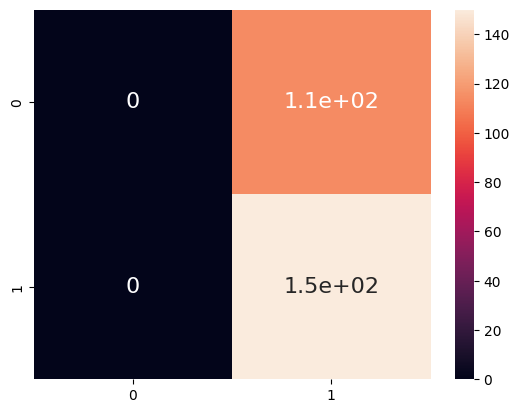

In [53]:
Y_Previsto_B = Base.predict(Xts)

Matriz_Conf_B = confusion_matrix(Yts,Y_Previsto_B)

Data_conf_B = pd.DataFrame(Matriz_Conf_B)

sns.heatmap(Data_conf_B, annot=True, annot_kws={"size": 16})

In [54]:
accuracy_score(Yts, Y_Previsto_B, normalize=True)

0.5681818181818182

# Arvore Aleatoria de Classificação 

 busca aleatória de hiperparâmetros para otimizar um modelo de Random Forest Classifier.

1. `N_Divisoes`: Define o número de divisões para a validação cruzada durante a busca de hiperparâmetros, neste caso, 10 divisões.
2. `N_Iter`: Define o número de iterações na busca aleatória, neste caso, 100 iterações.
3. `Espaco_de_Busca`: Define o espaço de busca para os hiperparâmetros do modelo, incluindo "max_depth", "min_samples_split", "min_samples_leaf" e "max_features".
4. `Tipo`: Cria uma instância do RandomForestClassifier, que será otimizado durante a busca.
5. `Buscador`: Utiliza RandomizedSearchCV para realizar a busca aleatória nos hiperparâmetros, usando o modelo definido, o espaço de busca, e a métrica de avaliação neg_root_mean_squared_error.
6. `refit=True`: Reajusta o melhor modelo encontrado com todos os dados de treino após a busca.
7. `error_score='raise'`: Eleva um erro caso ocorra algum problema durante a busca.
8. `n_jobs=4`: Utiliza 4 processadores para realizar a busca de forma mais eficiente.
9. `Buscador.fit(Xtr, Ytr)`: Executa a busca aleatória ajustando o modelo aos dados de treino.

Após a busca, os resultados são armazenados em um DataFrame chamado 'Resultados', que contém informações sobre os hiperparâmetros testados e as métricas de avaliação correspondentes.


In [10]:
N_Divisoes = 10
N_Iter = 100

Espaco_de_Busca = {
    "max_depth": [None, 2, 3, 5, 7, 10],
    "min_samples_split": [2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4],
    "max_features": [None, 0.33, "sqrt", "log2"],
}

Tipo = RandomForestClassifier()

Buscador = RandomizedSearchCV(
    Tipo,
    Espaco_de_Busca,
    n_iter= N_Iter,
    cv= N_Divisoes,
    scoring="neg_root_mean_squared_error",
    refit=True,# reajusta o melhor modelo com todos os dados de treino
    error_score='raise',
    n_jobs=4,
   )

Buscador.fit(Xtr, Ytr)

Resultados = pd.DataFrame(Buscador.cv_results_)
Resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.185114,0.012364,0.010661,0.003124,2,2,log2,5,"{'min_samples_split': 2, 'min_samples_leaf': 2...",-0.168232,...,-0.137361,-0.137361,-0.00000,-0.138013,-0.0,-0.09759,-0.138013,-0.105106,0.056113,22
1,0.157804,0.012196,0.010429,0.006057,3,1,sqrt,3,"{'min_samples_split': 3, 'min_samples_leaf': 1...",-0.168232,...,-0.137361,-0.137361,-0.00000,-0.138013,-0.0,-0.09759,-0.138013,-0.105106,0.056113,22
2,0.203004,0.012073,0.009843,0.004832,5,4,None,2,"{'min_samples_split': 5, 'min_samples_leaf': 4...",-0.168232,...,-0.137361,-0.137361,-0.00000,-0.097590,-0.0,-0.09759,-0.138013,-0.101064,0.055042,3
3,0.157608,0.006371,0.010218,0.005016,3,4,sqrt,3,"{'min_samples_split': 3, 'min_samples_leaf': 4...",-0.168232,...,-0.137361,-0.137361,-0.00000,-0.097590,-0.0,-0.09759,-0.138013,-0.101064,0.055042,3
4,0.181214,0.016057,0.011126,0.005609,2,2,log2,10,"{'min_samples_split': 2, 'min_samples_leaf': 2...",-0.168232,...,-0.137361,-0.137361,-0.00000,-0.138013,-0.0,-0.09759,-0.138013,-0.105106,0.056113,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.658896,0.033153,0.030440,0.002506,5,2,None,7,"{'min_samples_split': 5, 'min_samples_leaf': 2...",-0.168232,...,-0.137361,-0.137361,-0.09759,-0.000000,-0.0,-0.09759,-0.138013,-0.101064,0.055042,3
96,0.477418,0.031698,0.029771,0.005155,5,1,0.33,5,"{'min_samples_split': 5, 'min_samples_leaf': 1...",-0.168232,...,-0.137361,-0.137361,-0.09759,-0.097590,-0.0,-0.09759,-0.138013,-0.110823,0.043752,67
97,0.457934,0.028617,0.029754,0.007884,4,2,0.33,3,"{'min_samples_split': 4, 'min_samples_leaf': 2...",-0.168232,...,-0.137361,-0.137361,-0.00000,-0.097590,-0.0,-0.09759,-0.138013,-0.101064,0.055042,3
98,0.513330,0.030104,0.034213,0.007691,4,1,log2,7,"{'min_samples_split': 4, 'min_samples_leaf': 1...",-0.168232,...,-0.137361,-0.137361,-0.09759,-0.138013,-0.0,-0.09759,-0.138013,-0.114865,0.044208,74


informações sobre os melhores hiperparâmetros encontrados durante a busca aleatória.



In [11]:
Hiperparametros = Buscador.best_params_
print("A melhor métrica para o dados de treino foi: ", abs(Buscador.best_score_))
print("O Hiperparametros correspondentes são ", Hiperparametros)

A melhor métrica para o dados de treino foi:  0.09135064645318579
O Hiperparametros correspondentes são  {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.33, 'max_depth': 3}


Este trecho de código cria um novo modelo RandomForestClassifier utilizando os melhores hiperparâmetros encontrados durante a busca aleatória e o ajusta aos dados de treinamento.


In [12]:
TESTE = RandomForestClassifier(min_samples_split = Hiperparametros.get("min_samples_split"), min_samples_leaf = Hiperparametros.get("min_samples_leaf"), max_features =Hiperparametros.get("max_features"), max_depth = Hiperparametros.get("max_depth"))
TESTE.fit(Xtr,Ytr)

RandomForestClassifier(max_depth=3, max_features=0.33, min_samples_leaf=4,
                       min_samples_split=5)

utilizando o modelo RandomForestClassifier otimizado e, em seguida, é gerada uma matriz de confusão e exibido um mapa de calor.

<AxesSubplot: >

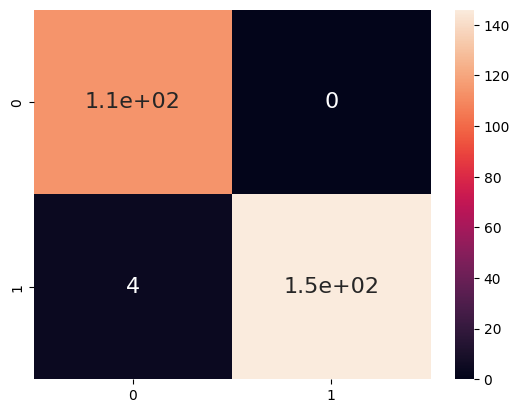

In [13]:
Y_Previsto = TESTE.predict(Xts)

Matriz_Conf = confusion_matrix(Yts,Y_Previsto)

Data_conf = pd.DataFrame(Matriz_Conf)

sns.heatmap(Data_conf, annot=True, annot_kws={"size": 16})

In [27]:
accuracy_score(Yts, Y_Previsto, normalize=True)

0.9848484848484849

# LogisticRegression

foi criado e treinado um modelo de Regressão Logística.


In [14]:
modelo_lr = LogisticRegression(max_iter=1000)

modelo_lr.fit(Xtr,Ytr)


LogisticRegression(max_iter=1000)

são realizadas previsões utilizando o modelo de Regressão Logística treinado, e em seguida, é gerada uma matriz de confusão e exibido um mapa de calor.

1. `y_verdadeiro`: Representa os rótulos reais dos dados de teste (Yts).
2. `y_previsao`: Gera previsões utilizando o modelo de Regressão Logística nos dados de teste (Xts).
3. `matriz_conf`: Calcula a matriz de confusão comparando as previsões (`y_previsao`) com os rótulos reais (`y_verdadeiro`).
4. `df_conf`: Converte a matriz de confusão em um DataFrame para facilitar a visualização.

<AxesSubplot: >

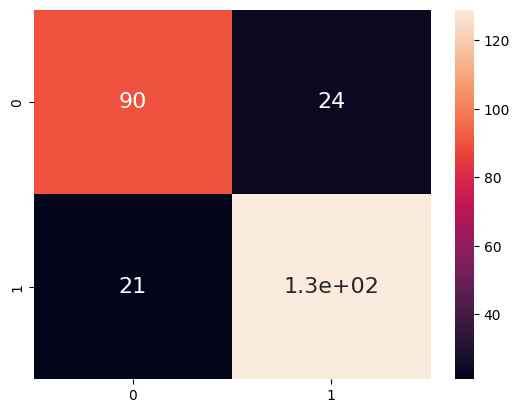

In [15]:
y_verdadeiro = Yts
y_previsao = modelo_lr.predict(Xts)

matriz_conf = confusion_matrix(y_verdadeiro, y_previsao)

df_conf = pd.DataFrame(matriz_conf)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

In [28]:
accuracy_score(Yts, y_previsao, normalize=True)

0.6856060606060606

# PCA

Dataframe usado para o PCA

In [16]:
Xtr

,Idade,Mulher,Homem,Impulso,Pressão Mâxima,Pressão Mínima,Glicose,CK-MB,Troponina
573,68,0.0,1.0,90,111,65,134.0,1.650,0.016
209,60,0.0,1.0,68,42,64,106.0,0.879,0.426
44,63,0.0,1.0,91,121,82,93.0,4.220,0.008
944,33,0.0,1.0,87,101,45,319.0,1.320,0.006
1152,60,1.0,0.0,94,157,79,129.0,0.728,0.009
...,...,...,...,...,...,...,...,...,...
672,58,0.0,1.0,60,150,83,133.0,52.940,1.310
473,64,1.0,0.0,63,104,87,227.0,0.493,0.011
820,58,0.0,1.0,80,109,67,150.0,6.190,0.014
289,53,1.0,0.0,82,80,80,118.0,1.640,0.008


foi realizado uma análise de Componentes Principais (PCA) nos dados de treinamento.

1. `pca`: Instancia um objeto PCA (Análise de Componentes Principais).
2. `pca.fit(Xtr)`: Ajusta o PCA aos dados de treinamento (features - Xtr).

Os resultados da análise são então impressos:

3. `autovalores`: Armazena os autovalores da matriz de covariância calculada pelo PCA.
4. `autovetores`: Armazena os autovetores correspondentes aos autovalores calculados.
5. `variancia_explicada`: Armazena a proporção da variância explicada por cada componente principal.


In [17]:
pca = PCA()
pca.fit(Xtr)

autovalores = pca.explained_variance_
autovetores = pca.components_.T

variancia_explicada = pca.explained_variance_ratio_

print(autovalores)
print()
print(variancia_explicada)
print()
print(autovetores)

[5.60044971e+03 2.26638095e+03 2.12174633e+03 7.28594684e+02
 1.84585310e+02 1.10760007e+02 1.49679009e+00 4.28177543e-01
 4.18089453e-31]

[5.08464226e-01 2.05764483e-01 1.92633121e-01 6.61490330e-02
 1.67584805e-02 1.00558891e-02 1.35893411e-04 3.88741931e-05
 3.79582964e-35]

[[-8.04169926e-05 -5.91127060e-03  6.53466296e-03  3.07435485e-03
   9.99856954e-01  9.65148029e-03 -7.97733693e-03 -6.49454411e-03
  -0.00000000e+00]
 [-1.01280194e-04  5.93298943e-04 -3.49304951e-04  1.01114433e-05
   4.27193006e-03 -8.34981649e-05 -4.01246469e-02  7.05954157e-01
  -7.07106781e-01]
 [ 1.01280194e-04 -5.93298943e-04  3.49304951e-04 -1.01114433e-05
  -4.27193006e-03  8.34981649e-05  4.01246469e-02 -7.05954157e-01
  -7.07106781e-01]
 [-1.78631593e-02  9.97042572e-01  6.40587695e-02 -2.37744235e-02
   5.82921513e-03 -2.97249478e-02  1.83998529e-05 -8.46206136e-04
   1.27900505e-16]
 [ 1.52403115e-02  1.37967126e-02 -3.41723265e-02  9.30512756e-01
   9.43575821e-04 -3.64076085e-01 -1.82328592e-03 

In [18]:
contagem_opcoes = Yts.value_counts()
contagem_opcoes

1.0    150
0.0    114
Name: Infarto, dtype: int64

é gerados gráficos para visualizar a variância explicada e a variância acumulada das Componentes Principais (PCAs) nos dados de treinamento.


[None]

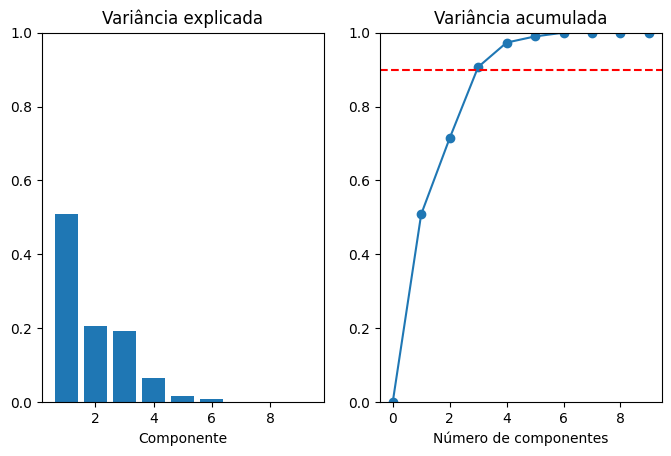

In [19]:
# Código abaixo baseado no notebook de PCA escrito pelo Prof. James de Almeida

id_componentes = np.arange(1, pca.n_components_ + 1)

figura, eixos = plt.subplots(1, 2)

# Plot variância explicada
eixos[0].bar(id_componentes, variancia_explicada)
eixos[0].set(xlabel="Componente", title="Variância explicada", ylim=(0.0, 1.0))

# Plot variância acumulada
cv = np.cumsum(pca.explained_variance_ratio_)
eixos[1].plot(np.r_[0, id_componentes], np.r_[0, cv], marker="o")
eixos[1].set(
    xlabel="Número de componentes",
    title="Variância acumulada",
    ylim=(0.0, 1.0),
)
eixos[1].axhline(0.9, linestyle="--", color="red")

figura.set(figwidth=8)

é criado um modelo composto por um pipeline que inclui a redução de dimensionalidade usando o método de Análise de Componentes Principais (PCA) com um número específico de componentes e um modelo de Regressão Logística.

1. `NUM_COMPONENTES`: Define o número desejado de componentes principais para o PCA, neste caso, 5 componentes.
2. `modelopca`: Cria um pipeline utilizando `make_pipeline`:
    - `PCA(NUM_COMPONENTES)`: Reduz a dimensionalidade dos dados para o número especificado de componentes principais.
    - `LogisticRegression()`: Adiciona um modelo de Regressão Logística ao pipeline.


In [43]:
NUM_COMPONENTES = 5

modelopca = make_pipeline(
    PCA(NUM_COMPONENTES),
    LogisticRegression(),
)
modelopca_2 = make_pipeline(
    PCA(NUM_COMPONENTES),
    TESTE,
)

treino do modelo

In [44]:
modelopca.fit(Xtr,Ytr)

Pipeline(steps=[('pca', PCA(n_components=5)),
                ('logisticregression', LogisticRegression())])

In [45]:
modelopca_2.fit(Xtr,Ytr)

Pipeline(steps=[('pca', PCA(n_components=5)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, max_features=0.33,
                                        min_samples_leaf=4,
                                        min_samples_split=5))])

foi realizado previsões utilizando o modelo  e em seguida, é gerado uma matriz de confusão e exibida em um mapa de calor.

<AxesSubplot: >

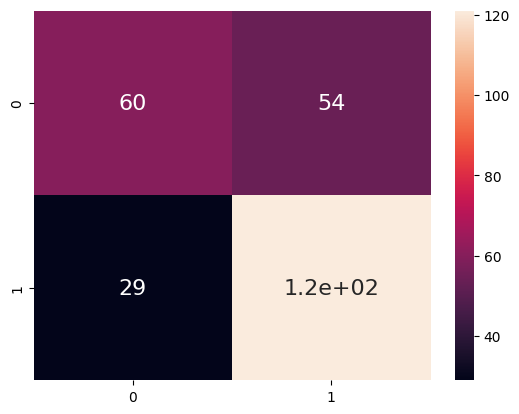

In [46]:
y_verdadeiro = Yts
y_previsao_PCA = modelopca.predict(Xts)

matriz_conf_PCA = confusion_matrix(y_verdadeiro, y_previsao_PCA)

df_conf_PCA = pd.DataFrame(matriz_conf_PCA)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

In [47]:
accuracy_score(Yts, y_previsao_PCA, normalize=True)

0.6856060606060606

<AxesSubplot: >

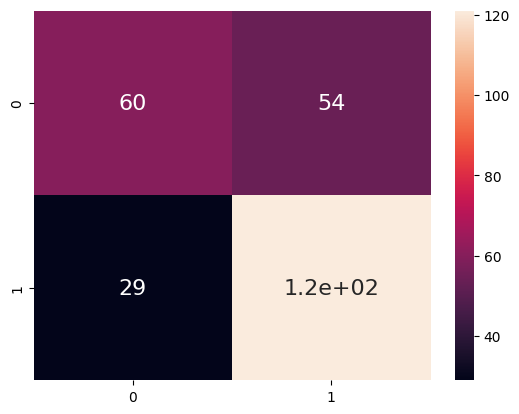

In [48]:
y_verdadeiro = Yts
y_previsao_PCA_2 = modelopca_2.predict(Xts)

matriz_conf_PCA_2 = confusion_matrix(y_verdadeiro, y_previsao_PCA_2)

df_conf_PCA_2 = pd.DataFrame(matriz_conf_PCA_2)

sns.heatmap(df_conf, annot=True, annot_kws={"size": 16})

In [49]:
accuracy_score(Yts, y_previsao_PCA_2, normalize=True)

0.6590909090909091

O PCA não resultou em melhoras no desempenho dos modelos no de regreção logistica se manteve o mesmo e no da floresta piorou por tanto opitamos por manter o modelo sem PCA. 

## Conclusão 

A partir de todas as analises desde o baseline foi possivel concluir que o modelo que melhor se adapita a nossos dados e nosso objetivo é o da floresta aleatroria de calcificação como os iper parametros obitinos atravez da validação cruzada

## Referencias:

Notebook de Módulo Pandas

1.Banco de dados da onde o Dataset foi tirado: https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset

2.Explicação sobre a funão loc do pandas: https://medium.com/horadecodar/data-science-tips-02-como-usar-loc-e-iloc-no-pandas-fab58e214d87

3.Explicação do que é CK_MB: https://ibapcursos.com.br/creatina-quinase-ckmb-alta-no-sangue-o-que-significa-essa-alteracao-no-exame/   e  https://labtestsonline.org.br/tests/ck-mb

4.Explicação do que é troponina: https://www.tuasaude.com/exame-de-troponina/

5.Explicação de como modificar o tipo de uma coluna: https://jobu.com.br/2022/11/29/3-metodos-de-como-alterar-tipo-da-coluna-com-pandas/

6.Ajudou na eXplicação das colunas: https://cardiopapers.com.br/por-que-nao-existe-aumento-falso-positivo-de-troponina/

7.Documentação da biblioteca Sckit learn https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier